# Kapitel 4 - Klassificering

## Faktafrågor

1. Vad kännetecknar klassificeringsproblem? Ge några exempel på tillämpningsområden. 

- Diagnosticering av sjukdom
- Bildigenkänning
- Anomalidetektion

2. Förklara hur *OvR-* och *OvO*-algoritmerna fungerar. 

Med OvR tränas en modell för varje klass.

Med OvO tränas en modell för varje par av klasser.

3. Förklara följande utvärderingsmått: 

a) *Confusion matrix*

En matris som visualiserar hur väl en modell presterar genom att jämföra sanna och predikterade värden.

b) *Accuracy* 

Ett mått på hur stor andel av alla observationer som klassificerats korrekt.

- Ett högt värde på accuaracy anger inte hur väl en modell presterar.

c) *Precision* 

Mäter hur stor andel av de positiva prediktionerna som faktiskt är korrekta.

- En modell som en klassificerar en observation som positiv om den är väldigt säker, ger en hög precision.

- Det här kan leda till att många värden som faktiskt är positiva, felaktigt predikteras som negativa.

d) *Recall* 

Mäter hur stor andel av den positiva klassen som predikterats korrekt.

- Om man bygger en modell som predikterar alla värden som positiva, så kommer precision att minska - felaktiga värden kommer att predikteras som positiva.

- En högre recall leder generellt till en lägre precision och vice versa. Detta kallas för <i>precision- recall tradeoff</i>

e) $F1$-score 

$F1$-score är det som benämns <i>det harmoniska medelvärdet</i> för <i>precision</i> och <i>recall</i>

- För ett högt värde, krävs att både precision och recall är högt.

f) *ROC*-kurvan

Liknar precision -recall kurvan, men istället för att visualisera sambandet mellan precison och recall (TP/FN, FP/TN) så visualiseras sambandet mellan <i>TPR</i> (<i>True Positive Rate</i>)

- <i>Sensitivity</i> anger hur väl modellen hittar positiva fall (recall).

- <i>Specificity</i> anger hur väl modellen hittar negativa fall.

- Precis som precison recall, så kan vi ändra <i>threshold</i> för att minska och öka TPR respektive FPR.


4. Vad är *precision-recall tradeoff* för något? 

- Om man bygger en modell som predikterar alla värden som positiva, så kommer precision att minska - felaktiga värden kommer att predikteras som positiva.

- Om man gör tvärtom, ökar precision, så leder det till att positiva värden predikteras som negativa.

- En högre recall leder generellt till en lägre precision och vice versa. Detta kallas för <i>precision- recall tradeoff</i>

5. Några vanligt förekommande modeller för klassificeringsproblem är enligt nedan. Förklara översiktligt hur respektive modell fungerar. Läs även igenom respektive modells dokumentation, notera att du inte behöver förstå alla detaljer från dokumentationen men det är bra att ha läst igenom den. 

a) Logistisk regression

##  Logistisk regression

Logistisk regression används när vi vill **förutsäga en klass** (t.ex. ja/nej, 0/1, blomart).  
Till skillnad från linjär regression (som förutspår ett tal) förutspår logistisk regression **sannolikheten** att en observation tillhör en viss klass.  

Formeln använder en **sigmoidfunktion** för att pressa resultatet mellan 0 och 1:

$$
p = \frac{1}{1 + e^{-(a \cdot x + b)}}
$$

- Om $p > 0.5$ → vi klassar som **1** (positiv klass)  
- Om $p \leq 0.5$ → vi klassar som **0** (negativ klass)

Exempel: för att förutsäga om en anställd lämnar företaget (`left=1`) eller stannar (`left=0`).


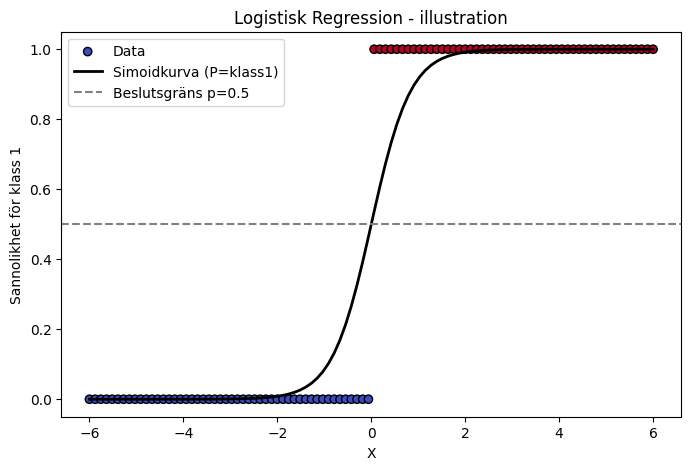

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Skapa lite enkel data
np.random.seed(42)
X = np.linspace(-6, 6, 100).reshape(-1, 1)
y = (X[:, 0] > 0).astype(int) # Binär klassificering 0 om x<0, 1 om x>=0

# Träna logistik regresssion
model = LogisticRegression()
model.fit(X, y)

# Prediktera sannolikheter
y_prob = model.predict_proba(X)[:, 1]

# Rita
plt.figure(figsize=(8, 5))
plt.scatter(X, y, c=y, cmap="coolwarm", edgecolors='k', label='Data')
plt.plot(X, y_prob, color="black", linewidth=2, label="Simoidkurva (P=klass1)")
plt.axhline(0.5, color="gray", linestyle="--", label="Beslutsgräns p=0.5")
plt.xlabel("X")
plt.ylabel("Sannolikhet för klass 1")
plt.title("Logistisk Regression - illustration")
plt.legend()
plt.show()

b) *Support vector machines*

## Support Vector Machines (SVM)

Support Vector Machines är en metod för **klassificering** (och även regression).  
Idén är att hitta en **beslutsgräns** (hyperplan) som skiljer klasserna åt så bra som möjligt.

Målet är att maximera *marginalen* – avståndet mellan beslutsgränsen och de närmaste datapunkterna (kallas **support vectors**).

### Formeln för ett linjärt SVM
Vi söker ett hyperplan av formen:

$$
w \cdot x + b = 0
$$

- $w$ = vikter (riktningen på hyperplanet)  
- $b$ = bias (förskjutningen)  

Beslutsregeln blir:

- Om $w \cdot x + b \geq 0$ → klassas som **1**  
- Om $w \cdot x + b < 0$ → klassas som **0**

### När datan inte är linjärt separerbar
- Vi kan använda en **kernel** (t.ex. RBF, polynomial) som projicerar datan till en högre dimension där en linjär gräns fungerar bättre.  
- Hyperparametrar:
  - **C** styr hur mycket modellen tillåter felklassificeringar.  
  - **γ (gamma)** styr hur långt varje datapunkt påverkar beslutsgränsen i RBF-kärnan.  


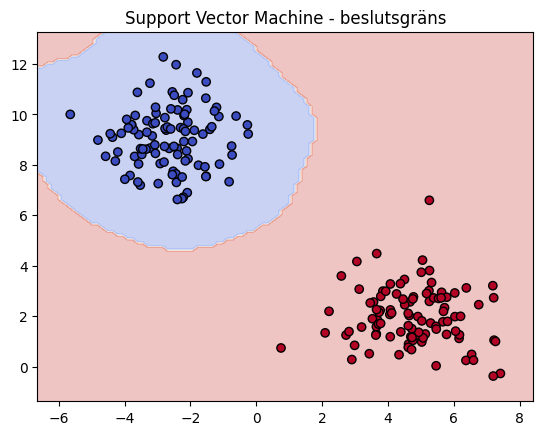

In [8]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# Skapa lite artificiell data
X, y = make_blobs(
    n_samples=200,
    centers=2,
    cluster_std=1.2,
    random_state=42
)

# Träna en SVM med RBF-kärna
model = SVC(kernel="rbf", C=1.0, gamma=0.5)
model.fit(X, y)

# Visualisera beslutsgränsen
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    cmap="coolwarm",
    alpha=0.3
)

# Rita punkterna
plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap=plt.cm.coolwarm,
    edgecolors='k'
)
plt.title("Support Vector Machine - beslutsgräns")
plt.show()

c) Beslutsträd

## Beslutsträd (Decision Trees)

Beslutsträd är en modell som delar upp datan i olika **regler** (ja/nej-frågor) för att klassificera observationer.  

Exempel på regler:  
- Är `petal_length < 2.5`?  
- Är `petal_width > 1.5`?  

### Hur det fungerar
- Trädet väljer de **splitpunkter** som bäst skiljer klasserna åt (t.ex. med Gini-index eller entropi).  
- Varje nod delar datan i två grenar tills vi når ett **blad** som representerar en klass.  
- Djupare träd → mer komplex modell (risk för överanpassning).  
- Viktiga hyperparametrar:
  - **max_depth** = hur djupt trädet får bli  
  - **min_samples_split** = minsta antal punkter för att dela en nod  
  - **min_samples_leaf** = minsta antal punkter i ett blad  

### Beslutsregel
När vi kommer till ett blad tar vi den klass som är vanligast bland datapunkterna där.


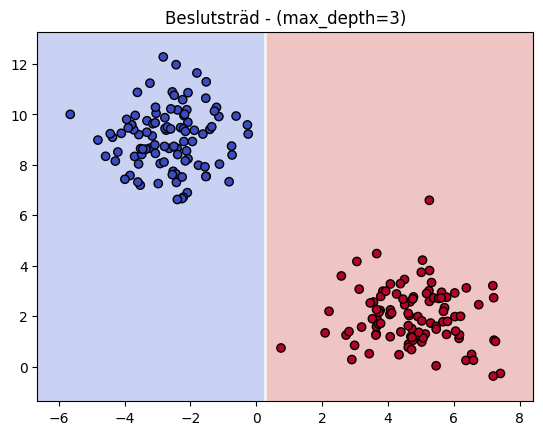

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Skapa artificiell data
X, y = make_blobs(
    n_samples=200,
    centers=2,
    cluster_std=1.2,
    random_state=42
)

# Träna beslutsträd med olika djup
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Visualisera beslutsgränsen
disp = DecisionBoundaryDisplay.from_estimator(
    tree,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.3
)

# Rita punkterna
plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap=plt.cm.coolwarm,
    edgecolors='k'
)
plt.title("Beslutsträd - (max_depth=3)")
plt.show()

d) *Ensemble learning*

## Ensemble Learning

Ensemble-metoder kombinerar flera olika modeller ("svaga lärande") för att skapa en starkare modell.  
Idén är att många enkla modeller tillsammans kan prestera bättre än en ensam modell.  

### Två huvudtyper:
- **Bagging (Bootstrap Aggregating)**  
  - Tränar flera modeller parallellt på slumpmässiga delmängder av datan.  
  - Exempel: Random Forest (många beslutsträd).  

- **Boosting**  
  - Tränar modeller sekventiellt, där varje ny modell fokuserar på de observationer som tidigare modeller hade svårt med.  
  - Exempel: AdaBoost, Gradient Boosting, XGBoost.  

### Fördelar
- Ger ofta högre noggrannhet.  
- Mindre risk för överanpassning (speciellt bagging).  

### Nackdelar
- Mer komplexa, svårare att tolka.  
- Kräver mer beräkningstid.


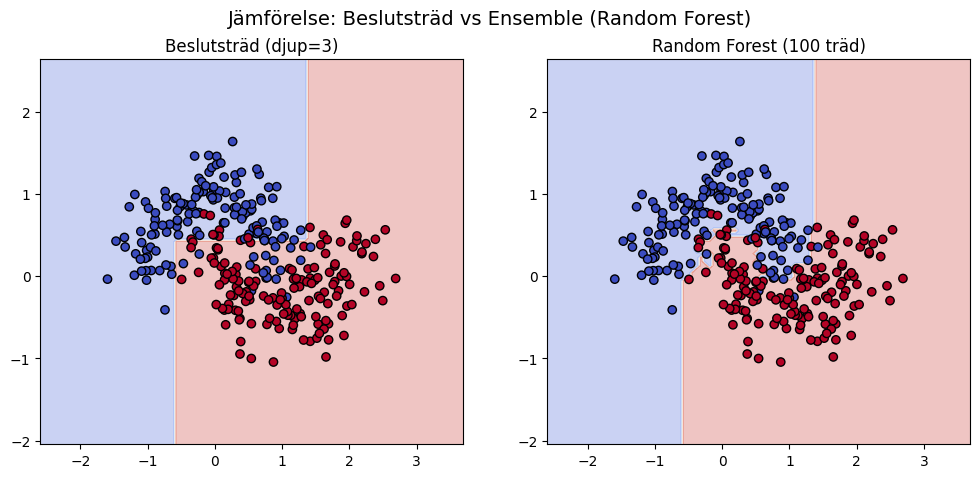

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# skapa dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# definiera modeller
models = {
    "Beslutsträd (djup=3)": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest (100 träd)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# rita
plt.figure(figsize=(12, 5))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 2, i)
    model.fit(X, y)

    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.3,
        ax=plt.gca()
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(name)

plt.suptitle("Jämförelse: Beslutsträd vs Ensemble (Random Forest)", fontsize=14)
plt.show()

6. Vad innebär det att vi kan kolla på *feature importance* med hjälp av trädmodeller såsom beslutsträd eller *random forest*? 